In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
#Importing dataset
raw_df = pd.read_csv("Airline_Delay_Cause.csv")
raw_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [3]:

print("Shape: ",raw_df.shape)
# Gettin total nan value
raw_df.isna().sum()


Shape:  (101315, 21)


year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            158
arr_del15              355
carrier_ct             158
weather_ct             158
nas_ct                 158
security_ct            158
late_aircraft_ct       158
arr_cancelled          158
arr_diverted           158
arr_delay              158
carrier_delay          158
weather_delay          158
nas_delay              158
security_delay         158
late_aircraft_delay    158
dtype: int64

In [4]:
# dropping 158 data points having same nan value in each column
raw_df = raw_df.dropna(subset=["late_aircraft_delay"])
raw_df.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights              0
arr_del15              197
carrier_ct               0
weather_ct               0
nas_ct                   0
security_ct              0
late_aircraft_ct         0
arr_cancelled            0
arr_diverted             0
arr_delay                0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
dtype: int64

In [5]:
print("Shape: ",raw_df.shape)

Shape:  (101157, 21)


In [6]:
# splitting into train test split
X = raw_df.drop(columns=["arr_delay"])
y = raw_df["arr_delay"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,80925.000000,80925.000000,80925.000000,80772.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000
mean,2019.514291,6.271276,337.713018,58.316966,18.522622,2.060025,17.288814,0.154113,20.181147,8.037566,0.780587,1326.649503,213.536917,842.604103,7.413753,1449.901427
std,1.559874,3.435909,951.963203,164.795715,47.441524,6.902137,58.824322,0.746294,63.652620,50.735457,3.422616,3981.770577,809.120417,3425.551096,45.827997,4710.846044
min,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,42.000000,5.000000,1.910000,0.000000,0.940000,0.000000,1.000000,0.000000,0.000000,86.000000,0.000000,24.000000,0.000000,42.000000
50%,2019.000000,6.000000,90.000000,14.000000,5.300000,0.240000,3.210000,0.000000,3.980000,1.000000,0.000000,317.000000,12.000000,120.000000,0.000000,254.000000
75%,2021.000000,9.000000,226.000000,40.000000,14.650000,1.670000,9.840000,0.000000,12.730000,4.000000,1.000000,991.000000,132.000000,401.000000,0.000000,922.000000
max,2022.000000,12.000000,21931.000000,4176.000000,1147.000000,222.900000,1884.420000,58.690000,1531.810000,4951.000000,143.000000,151581.000000,26446.000000,112018.000000,3760.000000,147167.000000


In [8]:
cols = ["year","month","carrier","carrier_name","airport"]
for col in cols:
    print(X_train[col].value_counts())

2019    16767
2021    15957
2020    14953
2018    13678
2017    10056
2022     9514
Name: year, dtype: int64
1     7352
3     7253
4     7237
7     7148
2     7096
6     7072
5     7046
12    6205
9     6174
11    6160
10    6156
8     6026
Name: month, dtype: int64
OO    11917
DL     7149
AA     5366
MQ     5365
G4     5315
UA     5182
WN     4964
F9     4565
YV     4213
9E     4172
AS     3855
EV     3791
YX     3683
OH     3508
B6     3397
NK     2505
HA      971
QX      734
VX      273
Name: carrier, dtype: int64
SkyWest Airlines Inc.       11917
Delta Air Lines Inc.         7149
American Airlines Inc.       5366
Envoy Air                    5365
Allegiant Air                5315
United Air Lines Inc.        5182
Southwest Airlines Co.       4964
Frontier Airlines Inc.       4565
Mesa Airlines Inc.           4213
Endeavor Air Inc.            4172
Alaska Airlines Inc.         3855
Republic Airline             3683
PSA Airlines Inc.            3508
JetBlue Airways              3397
E

In [9]:
train_country = X_train["airport_name"].apply(lambda x: x.split(", ")[1].split(": ")[0])
test_country = X_test["airport_name"].apply(lambda x: x.split(", ")[1].split(": ")[0])

In [10]:
X_train["country"] = train_country
X_test["country"] = test_country
train_data = pd.concat([X_train, y_train], axis=1)

train_data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,country,arr_delay
83710,2018,4,9E,Endeavor Air Inc.,GNV,"Gainesville, FL: Gainesville Regional",168.0,18.0,4.98,2.71,...,5.54,0.0,1.0,371.0,132.0,137.0,0.0,341.0,FL,981.0
1018,2022,7,OH,PSA Airlines Inc.,TUL,"Tulsa, OK: Tulsa International",52.0,11.0,2.44,0.37,...,5.21,0.0,0.0,61.0,48.0,210.0,0.0,363.0,OK,682.0
58716,2019,8,MQ,Envoy Air,MIA,"Miami, FL: Miami International",1059.0,307.0,62.88,10.20,...,129.23,46.0,9.0,4029.0,696.0,5443.0,0.0,8439.0,FL,18607.0
93282,2017,8,EV,ExpressJet Airlines Inc.,TVC,"Traverse City, MI: Cherry Capital",74.0,6.0,1.03,0.00,...,3.00,1.0,0.0,48.0,0.0,85.0,0.0,182.0,MI,315.0
79646,2018,8,OO,SkyWest Airlines Inc.,TYS,"Knoxville, TN: McGhee Tyson",187.0,69.0,24.56,1.00,...,25.37,2.0,0.0,4077.0,38.0,721.0,0.0,1795.0,TN,6631.0


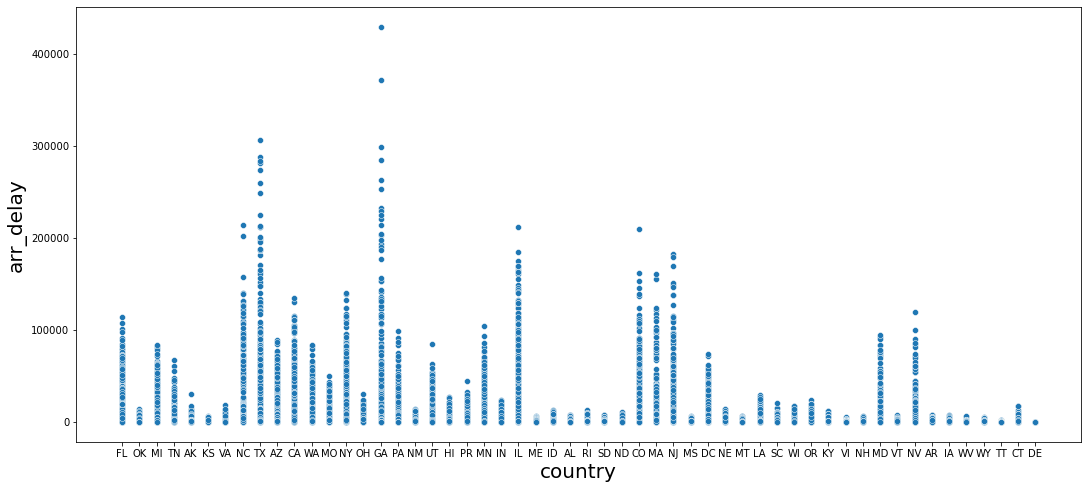

In [11]:
fig, ax = plt.subplots(figsize=(18,8))

sns.scatterplot(data=train_data, x="country", y="arr_delay")
plt.xlabel('country', fontsize=20)
plt.ylabel('arr_delay', fontsize=20)
plt.show()

In [12]:
countMapCountry = X_train["country"].value_counts().to_dict()
X_train["country"] = X_train["country"].map(countMapCountry)
X_test["country"] = X_test["country"].map(countMapCountry)

In [13]:
countMapMonth = X_train["month"].value_counts().to_dict()
X_train["month"] = X_train["month"].map(countMapMonth)
X_test["month"] = X_test["month"].map(countMapMonth)

In [14]:
X_train["carrier_name"] = X_train["carrier_name"].apply(lambda x: x.split(" ")[0])
X_test["carrier_name"] = X_test["carrier_name"].apply(lambda x: x.split(" ")[0])

In [15]:
X_train = X_train.drop(columns = ['airport_name', 'airport', 'carrier', 'arr_cancelled', 'security_delay', 'security_ct'])
X_test = X_test.drop(columns = ['airport_name', 'airport', 'carrier', 'arr_cancelled', 'security_delay', 'security_ct'])

In [16]:
X_train.head()

,year,month,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_diverted,carrier_delay,weather_delay,nas_delay,late_aircraft_delay,country
83710,2018,7237,Endeavor,168.0,18.0,4.98,2.71,4.77,5.54,1.0,371.0,132.0,137.0,341.0,6045
1018,2022,7148,PSA,52.0,11.0,2.44,0.37,2.97,5.21,0.0,61.0,48.0,210.0,363.0,1205
58716,2019,6026,Envoy,1059.0,307.0,62.88,10.20,104.70,129.23,9.0,4029.0,696.0,5443.0,8439.0,6045
93282,2017,6026,ExpressJet,74.0,6.0,1.03,0.00,1.97,3.00,0.0,48.0,0.0,85.0,182.0,2542
79646,2018,6026,SkyWest,187.0,69.0,24.56,1.00,18.07,25.37,0.0,4077.0,38.0,721.0,1795.0,2228


In [17]:
X_train.shape

(80925, 15)

In [18]:
train_data = pd.concat([X_train, y_train], axis=1)

<AxesSubplot:xlabel='carrier_name', ylabel='arr_delay'>

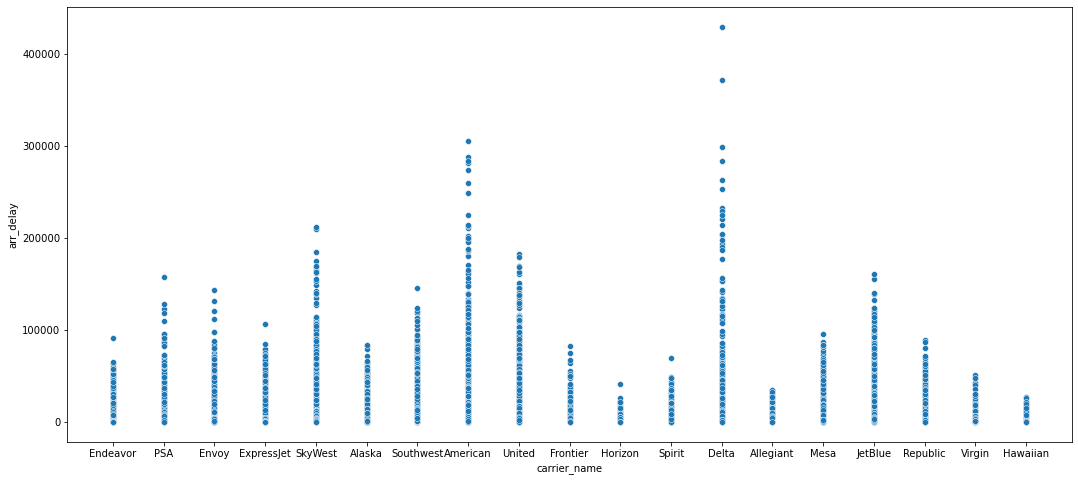

In [19]:
fig, ax = plt.subplots(figsize=(18,8))
sns.scatterplot(data=train_data, x="carrier_name", y="arr_delay")

In [20]:
print("Total unique category: ", len(X_train['carrier_name'].unique()))
X_train['carrier_name'][9]

Total unique category:  19


'Endeavor'

In [21]:
train_data.corr()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_diverted,carrier_delay,weather_delay,nas_delay,late_aircraft_delay,country,arr_delay
year,1.000000,0.179086,-0.046702,-0.052142,0.003154,-0.007022,-0.079342,-0.064047,-0.031495,-0.000500,-0.006881,-0.074196,-0.053907,0.001761,-0.043355
month,0.179086,1.000000,-0.001134,0.012053,0.013816,0.026169,0.005555,0.011603,0.011532,0.016870,0.026247,0.009999,0.017095,0.005165,0.017129
arr_flights,-0.046702,-0.001134,1.000000,0.911581,0.887289,0.731865,0.808464,0.865045,0.655060,0.874095,0.659738,0.691745,0.839435,0.072174,0.872509
arr_del15,-0.052142,0.012053,0.911581,1.000000,0.933625,0.768903,0.908795,0.962029,0.713586,0.902597,0.699013,0.826649,0.951594,0.086619,0.968308
carrier_ct,0.003154,0.013816,0.887289,0.933625,1.000000,0.746687,0.740117,0.898951,0.657905,0.939294,0.664278,0.644968,0.874977,0.087428,0.895487
weather_ct,-0.007022,0.026169,0.731865,0.768903,0.746687,1.000000,0.672227,0.698879,0.649079,0.794338,0.922188,0.630262,0.736780,0.052376,0.804877
nas_ct,-0.079342,0.005555,0.808464,0.908795,0.740117,0.672227,1.000000,0.797805,0.662481,0.748346,0.624588,0.943302,0.817059,0.078378,0.891417
late_aircraft_ct,-0.064047,0.011603,0.865045,0.962029,0.898951,0.698879,0.797805,1.000000,0.669211,0.851919,0.632616,0.714083,0.969346,0.079915,0.921262
arr_diverted,-0.031495,0.011532,0.655060,0.713586,0.657905,0.649079,0.662481,0.669211,1.000000,0.674802,0.611373,0.657287,0.699357,0.063881,0.736417
carrier_delay,-0.000500,0.016870,0.874095,0.902597,0.939294,0.794338,0.748346,0.851919,0.674802,1.000000,0.743763,0.686677,0.882887,0.070567,0.936307


<AxesSubplot:>

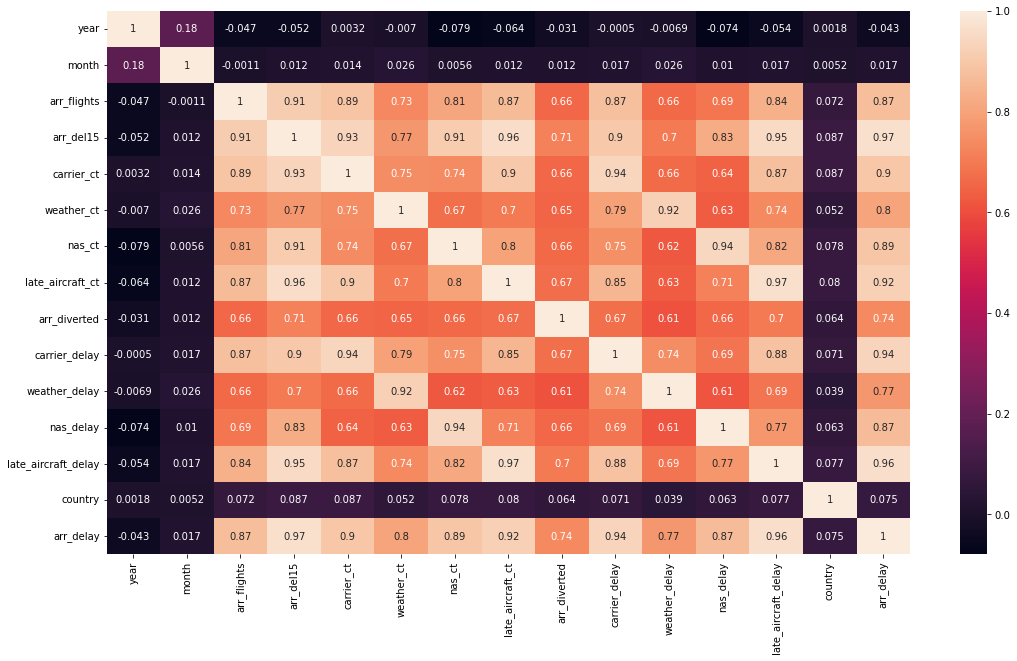

In [22]:
plt.figure(figsize=(18,10))
sns.heatmap(train_data.corr(), annot=True)

In [30]:
train_data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_diverted,carrier_delay,weather_delay,nas_delay,late_aircraft_delay,country,arr_delay
count,80925.000000,80925.000000,80925.000000,80772.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000,80925.000000
mean,2019.514291,6782.989373,337.713018,58.316966,18.522622,2.060025,17.288814,20.181147,0.780587,1326.649503,213.536917,842.604103,1449.901427,2670.617473,3840.114637
std,1.559874,507.306925,951.963203,164.795715,47.441524,6.902137,58.824322,63.652620,3.422616,3981.770577,809.120417,3425.551096,4710.846044,1970.372968,11867.950661
min,2017.000000,6026.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2018.000000,6174.000000,42.000000,5.000000,1.910000,0.000000,0.940000,1.000000,0.000000,86.000000,0.000000,24.000000,42.000000,1190.000000,265.000000
50%,2019.000000,7072.000000,90.000000,14.000000,5.300000,0.240000,3.210000,3.980000,0.000000,317.000000,12.000000,120.000000,254.000000,1890.000000,867.000000
75%,2021.000000,7237.000000,226.000000,40.000000,14.650000,1.670000,9.840000,12.730000,1.000000,991.000000,132.000000,401.000000,922.000000,4072.000000,2525.000000
max,2022.000000,7352.000000,21931.000000,4176.000000,1147.000000,222.900000,1884.420000,1531.810000,143.000000,151581.000000,26446.000000,112018.000000,147167.000000,6193.000000,429194.000000


In [24]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (80925, 15)
X_test shape:  (20232, 15)


In [25]:
X_train.head()

,year,month,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_diverted,carrier_delay,weather_delay,nas_delay,late_aircraft_delay,country
83710,2018,7237,Endeavor,168.0,18.0,4.98,2.71,4.77,5.54,1.0,371.0,132.0,137.0,341.0,6045
1018,2022,7148,PSA,52.0,11.0,2.44,0.37,2.97,5.21,0.0,61.0,48.0,210.0,363.0,1205
58716,2019,6026,Envoy,1059.0,307.0,62.88,10.20,104.70,129.23,9.0,4029.0,696.0,5443.0,8439.0,6045
93282,2017,6026,ExpressJet,74.0,6.0,1.03,0.00,1.97,3.00,0.0,48.0,0.0,85.0,182.0,2542
79646,2018,6026,SkyWest,187.0,69.0,24.56,1.00,18.07,25.37,0.0,4077.0,38.0,721.0,1795.0,2228


In [26]:
X_train['carrier_name'].value_counts()

SkyWest       11917
Delta          7149
American       5366
Envoy          5365
Allegiant      5315
United         5182
Southwest      4964
Frontier       4565
Mesa           4213
Endeavor       4172
Alaska         3855
ExpressJet     3791
Republic       3683
PSA            3508
JetBlue        3397
Spirit         2505
Hawaiian        971
Horizon         734
Virgin          273
Name: carrier_name, dtype: int64

In [27]:
countMapCarrier = X_train["carrier_name"].value_counts().to_dict()
X_train["carrier_name"] = X_train["carrier_name"].map(countMapCarrier)
X_test["carrier_name"] = X_test["carrier_name"].map(countMapCarrier)

In [28]:
X_train.head()

,year,month,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_diverted,carrier_delay,weather_delay,nas_delay,late_aircraft_delay,country
83710,2018,7237,4172,168.0,18.0,4.98,2.71,4.77,5.54,1.0,371.0,132.0,137.0,341.0,6045
1018,2022,7148,3508,52.0,11.0,2.44,0.37,2.97,5.21,0.0,61.0,48.0,210.0,363.0,1205
58716,2019,6026,5365,1059.0,307.0,62.88,10.20,104.70,129.23,9.0,4029.0,696.0,5443.0,8439.0,6045
93282,2017,6026,3791,74.0,6.0,1.03,0.00,1.97,3.00,0.0,48.0,0.0,85.0,182.0,2542
79646,2018,6026,11917,187.0,69.0,24.56,1.00,18.07,25.37,0.0,4077.0,38.0,721.0,1795.0,2228


<AxesSubplot:xlabel='arr_flights', ylabel='arr_delay'>

<Figure size 1296x864 with 0 Axes>

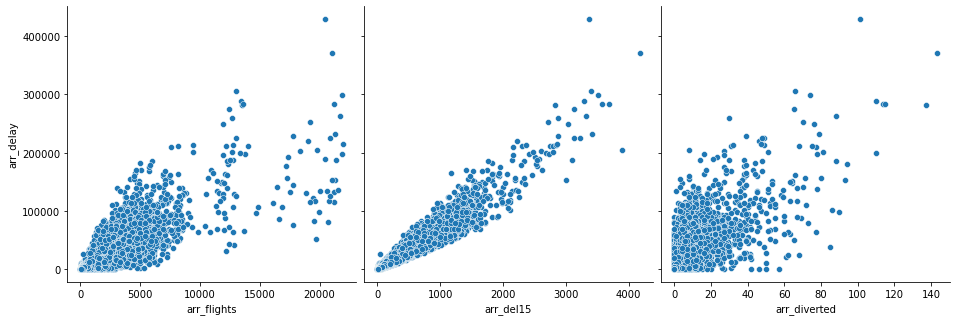

In [39]:

sns.pairplot(
    train_data,
    x_vars=['arr_flights','arr_del15', 'arr_diverted'],
    y_vars=["arr_delay"], height= 4.5
)
plt.subplot(1,3,1)

Text(0.5, 0, 'Delays')

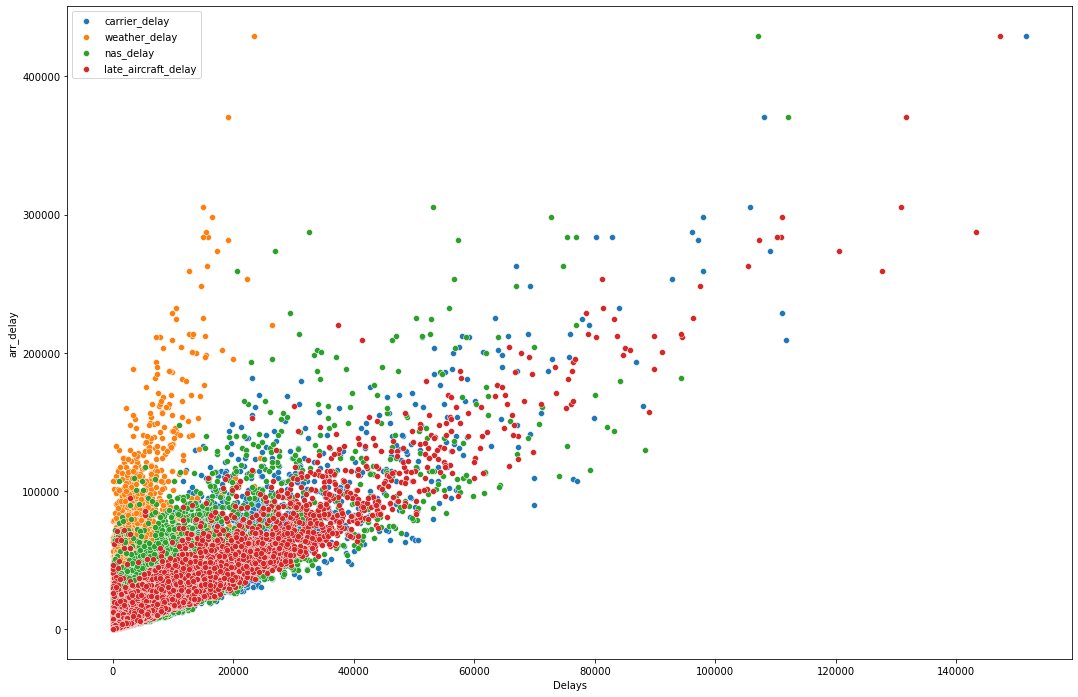

In [54]:
plt.figure(figsize=(18,12))
sns.scatterplot(data=train_data, x='carrier_delay', y='arr_delay')
sns.scatterplot(data=train_data, x='weather_delay', y='arr_delay')
sns.scatterplot(data=train_data, x='nas_delay', y='arr_delay')
sns.scatterplot(data=train_data, x='late_aircraft_delay', y='arr_delay')
plt.legend(['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay'])
plt.xlabel("Delays")

In [50]:
X_train.columns

Index(['year', 'month', 'carrier_name', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct',
       'arr_diverted', 'carrier_delay', 'weather_delay', 'nas_delay',
       'late_aircraft_delay', 'country'],
      dtype='object')

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80925 entries, 83710 to 15802
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 80925 non-null  int64  
 1   month                80925 non-null  int64  
 2   carrier_name         80925 non-null  int64  
 3   arr_flights          80925 non-null  float64
 4   arr_del15            80772 non-null  float64
 5   carrier_ct           80925 non-null  float64
 6   weather_ct           80925 non-null  float64
 7   nas_ct               80925 non-null  float64
 8   late_aircraft_ct     80925 non-null  float64
 9   arr_diverted         80925 non-null  float64
 10  carrier_delay        80925 non-null  float64
 11  weather_delay        80925 non-null  float64
 12  nas_delay            80925 non-null  float64
 13  late_aircraft_delay  80925 non-null  float64
 14  country              80925 non-null  int64  
dtypes: float64(11), int64(4)
memory 

In [63]:
print(X_train.shape)
y_train.shape

(80925, 15)


(80925,)

In [64]:
X_train.to_csv('cleaned_X_train.csv', index= False)
X_test.to_csv('cleaned_X_test.csv', index= False)
y_train.to_csv('cleaned_y_train.csv', index= False)
y_test.to_csv('cleaned_y_test.csv', index= False)